## Part_1 EDA

In [21]:
import pandas as pd

# Read csv into pandas DataFrame
df = pd.read_csv('train.csv')

print('The data consists of {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data consists of 595212 rows and 59 columns


In [22]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [23]:
# Check out the datatypes of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [24]:
# print out the unique values for each feature
for col in df.columns:
    print('----------------')
    print('Feature: {}'.format(col))
    print('Unique Values: {}'.format(df[col].unique()))

----------------
Feature: id
Unique Values: [      7       9      13 ..., 1488017 1488021 1488027]
----------------
Feature: target
Unique Values: [0 1]
----------------
Feature: ps_ind_01
Unique Values: [2 1 5 0 4 3 6 7]
----------------
Feature: ps_ind_02_cat
Unique Values: [ 2  1  4  3 -1]
----------------
Feature: ps_ind_03
Unique Values: [ 5  7  9  2  0  4  3  1 11  6  8 10]
----------------
Feature: ps_ind_04_cat
Unique Values: [ 1  0 -1]
----------------
Feature: ps_ind_05_cat
Unique Values: [ 0  1  4  3  6  5 -1  2]
----------------
Feature: ps_ind_06_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_07_bin
Unique Values: [1 0]
----------------
Feature: ps_ind_08_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_09_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_10_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_11_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_12_bin
Unique Values: [0 1]
----------------
Feature: ps_ind_13_bin
Uni

In [29]:
# convert _bin and _cat to categorical variables
for col in df.columns:
    if col.endswith('_cat') or col.endswith('_bin'):
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float64
ps_re

In [35]:
# Seperate dataframe by numeric and categorical cols
df_numeric = df.select_dtypes(exclude=['category'])
df_cat = df.select_dtypes(include=['category'])

In [37]:
!pip install seaborn

    100% |████████████████████████████████| 184kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 16.2MB 32kB/s  eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/mehrco/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


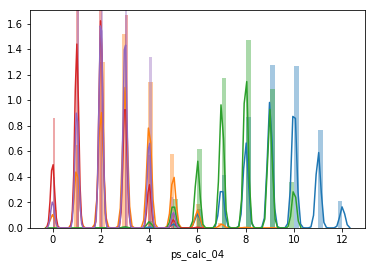

In [44]:
import seaborn as sns
%matplotlib inline
sns.distplot(df_numeric['ps_calc_08'])
sns.distplot(df_numeric['ps_calc_07'])
sns.distplot(df_numeric['ps_calc_06'])
sns.distplot(df_numeric['ps_calc_05'])
sns.distplot(df_numeric['ps_calc_04'])

In [46]:
!pip install sklearn

    100% |████████████████████████████████| 7.6MB 72kB/s  eta 0:00:01


In [54]:
df_numeric.shape

(595212, 28)

In [52]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_sc = scaler.fit_transform(df_numeric.drop(['id','target'],axis=1))

In [53]:
X_num_sc.shape

(595212, 26)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import t_sne
pca = PCA()
tsne = t_sne.TSNE(n_components=2)

In [ ]:
X_tsne = tsne.fit_transform(X_num_sc)


In [ ]:
X_tsne.shape

In [ ]:
print('why')

In [ ]:
print('why')